In [28]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [93]:
lead_parts1 = pd.read_csv(
    'C:/Users/502689880/GE Projects/lead_parts1.csv')

lead_parts1.head()

lead_subset = ['id_tparent', 'id_req', 'id_frame', 'id_task', 'id_partL1', 'num_totLead', 'num_partCount']
lead_est1 = lead_parts1[lead_subset]
lead_est1 = lead_est1.drop_duplicates()
lead_est1.head()

,id_tparent,id_req,id_frame,id_task,id_partL1,num_totLead,num_partCount
0,367A6051G007,CR3B,61B,0512,101T9058G003,100.500000,2
1,367A7381G003,CR3B,61B,0512,101T9058G003,100.500000,2
2,367A6051G007,CR3B,61B,0548,227C5789G001,31.000000,2
4,367A6051G007,CR3B,61B,1213,145E7963G001,136.142857,1
5,367A6051G007,CR3B,61B,1612,111E3164G001,51.000000,1


In [30]:
lead_parts2 = pd.read_csv(
    'C:/Users/502689880/GE Projects/lead_parts2.csv')

lead_parts2.head()

,id_baseReq,id_frame,id_task,id_partL1,num_partCount,id_tparent,desc_projectState,id_req,desc_frameFam,desc_status,num_stockInd,num_totLead,date_contractStart,date_issueFMI
0,CR3B,61B,0512,101T9058G003,2,367A6051G007,Complete,CR3B,6/1A-C,Active,0,100.500000,10/19/2015,4/8/2016
1,CR3B,61B,0512,101T9058G003,2,367A7381G003,Complete,CR3B,6/1A-C,Active,0,100.500000,8/13/2015,2/26/2016
2,CR3B,61B,0548,227C5789G001,2,367A6051G007,Complete,CR3B,6/1A-C,Active,0,31.000000,10/19/2015,4/8/2016
3,CR3B,61B,0548,227C5789G001,2,367A6051G007,Complete,CR3B,6/1A-C,Active,0,31.000000,10/19/2015,4/8/2016
4,CR3B,61B,1213,145E7963G001,1,367A6051G007,Complete,CR3B,6/1A-C,Active,0,136.142857,10/19/2015,4/8/2016


In [31]:
lead_parts3 = pd.read_csv(
    'C:/Users/502689880/GE Projects/lead_parts3.csv')

lead_parts3.head()

,id_req,desc_frameFam,id_task,id_partL1,num_partCount,id_tparent,desc_projectState,id_baseReq,id_frame,desc_status,num_stockInd,num_totLead,date_contractStart,date_issueFMI
0,CR3B,6/1A-C,0512,101T9058G003,2,367A6051G007,Complete,CR3B,61B,Active,0,100.500000,10/19/2015,4/8/2016
1,CR3B,6/1A-C,0512,101T9058G003,2,367A7381G003,Complete,CR3B,61B,Active,0,100.500000,8/13/2015,2/26/2016
2,CR3B,6/1A-C,0548,227C5789G001,2,367A6051G007,Complete,CR3B,61B,Active,0,31.000000,10/19/2015,4/8/2016
3,CR3B,6/1A-C,0548,227C5789G001,2,367A6051G007,Complete,CR3B,61B,Active,0,31.000000,10/19/2015,4/8/2016
4,CR3B,6/1A-C,1213,145E7963G001,1,367A6051G007,Complete,CR3B,61B,Active,0,136.142857,10/19/2015,4/8/2016


In [32]:
lead_parts4 = pd.read_csv(
    'C:/Users/502689880/GE Projects/lead_parts4.csv')

lead_parts4.head()

,id_baseReq,desc_frameFam,id_task,id_partL1,num_partCount,id_tparent,desc_projectState,id_req,id_frame,desc_status,num_stockInd,num_totLead,date_contractStart,date_issueFMI
0,CR3B,6/1A-C,0512,101T9058G003,2,367A6051G007,Complete,CR3B,61B,Active,0,100.500000,10/19/2015,4/8/2016
1,CR3B,6/1A-C,0512,101T9058G003,2,367A7381G003,Complete,CR3B,61B,Active,0,100.500000,8/13/2015,2/26/2016
2,CR3B,6/1A-C,0548,227C5789G001,2,367A6051G007,Complete,CR3B,61B,Active,0,31.000000,10/19/2015,4/8/2016
3,CR3B,6/1A-C,0548,227C5789G001,2,367A6051G007,Complete,CR3B,61B,Active,0,31.000000,10/19/2015,4/8/2016
4,CR3B,6/1A-C,1213,145E7963G001,1,367A6051G007,Complete,CR3B,61B,Active,0,136.142857,10/19/2015,4/8/2016


In [95]:
lead_est1.describe()

,num_totLead,num_partCount
count,15745.000000,15745.000000
mean,84.983338,9.422547
std,43.500647,16.200573
min,16.000000,1.000000
25%,51.942857,2.000000
50%,76.000000,3.000000
75%,110.000000,9.000000
max,336.000000,123.000000


In [96]:
lead_est1['num_idReq'] = pd.factorize(lead_est1.id_req, sort=True)[0]
lead_est1['num_idFrame'] = pd.factorize(lead_est1.id_frame, sort=True)[0]
lead_est1['num_idTask'] = pd.factorize(lead_est1.id_task, sort=True)[0]
lead_est1['num_idPartL1'] = pd.factorize(lead_est1.id_partL1, sort=True)[0]
lead_est1.head()

,id_tparent,id_req,id_frame,id_task,id_partL1,num_totLead,num_partCount,num_idReq,num_idFrame,num_idTask,num_idPartL1
0,367A6051G007,CR3B,61B,0512,101T9058G003,100.500000,2,0,8,9,84
1,367A7381G003,CR3B,61B,0512,101T9058G003,100.500000,2,0,8,9,84
2,367A6051G007,CR3B,61B,0548,227C5789G001,31.000000,2,0,8,17,941
4,367A6051G007,CR3B,61B,1213,145E7963G001,136.142857,1,0,8,132,852
5,367A6051G007,CR3B,61B,1612,111E3164G001,51.000000,1,0,8,160,317


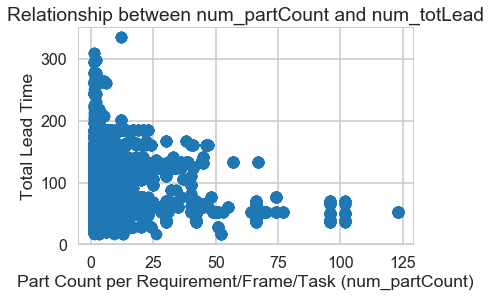

In [97]:
plt.scatter(lead_est1.num_partCount, lead_est1.num_totLead)
plt.xlabel("Part Count per Requirement/Frame/Task (num_partCount)")
plt.ylabel("Total Lead Time")
plt.title("Relationship between num_partCount and num_totLead")

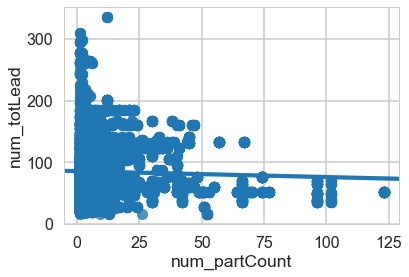

In [98]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="num_totLead", x="num_partCount", data=lead_est1, fit_reg = True)

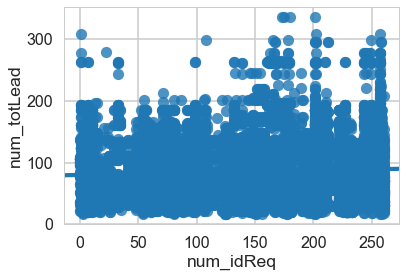

In [99]:
sns.regplot(y="num_totLead", x="num_idReq", data=lead_est1, fit_reg = True)

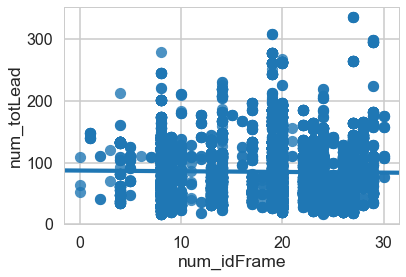

In [100]:
sns.regplot(y="num_totLead", x="num_idFrame", data=lead_est1, fit_reg = True)

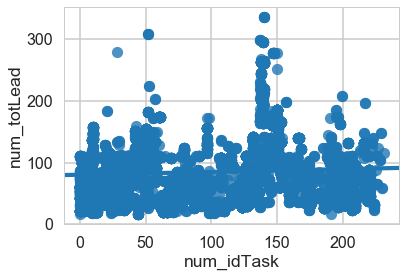

In [101]:
sns.regplot(y="num_totLead", x="num_idTask", data=lead_est1, fit_reg = True)

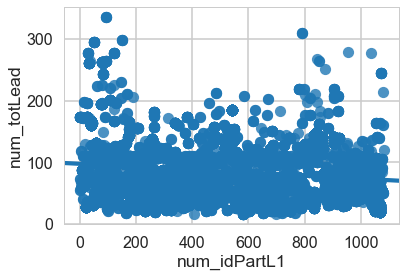

In [102]:
sns.regplot(y="num_totLead", x="num_idPartL1", data=lead_est1, fit_reg = True)

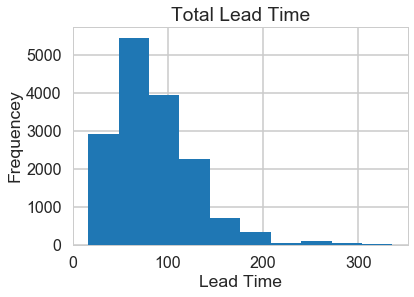

In [103]:
plt.hist(lead_est1.num_totLead)
plt.title("Total Lead Time")
plt.xlabel("Lead Time")
plt.ylabel("Frequencey")
plt.show()

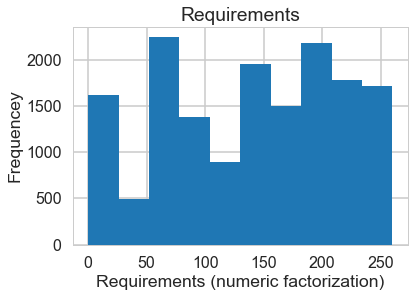

In [104]:
plt.hist(lead_est1.num_idReq)
plt.title("Requirements")
plt.xlabel("Requirements (numeric factorization)")
plt.ylabel("Frequencey")
plt.show()

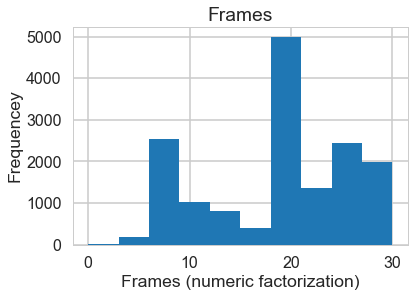

In [105]:
plt.hist(lead_est1.num_idFrame)
plt.title("Frames")
plt.xlabel("Frames (numeric factorization)")
plt.ylabel("Frequencey")
plt.show()

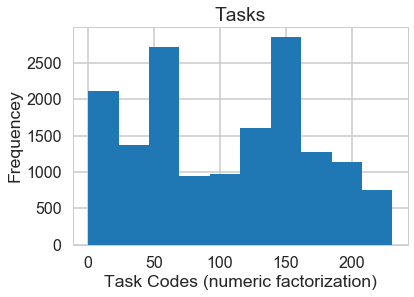

In [106]:
plt.hist(lead_est1.num_idTask)
plt.title("Tasks")
plt.xlabel("Task Codes (numeric factorization)")
plt.ylabel("Frequencey")
plt.show()

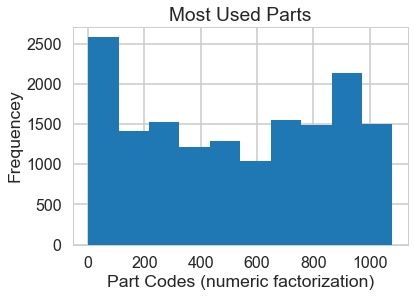

In [107]:
plt.hist(lead_est1.num_idPartL1)
plt.title("Most Used Parts")
plt.xlabel("Part Codes (numeric factorization)")
plt.ylabel("Frequencey")
plt.show()

In [80]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [109]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
# Groupby and count
m = ols('num_totLead ~ num_idReq',lead_est1).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:            num_totLead   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     65.05
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           7.83e-16
Time:                        17:48:51   Log-Likelihood:                -81711.
No. Observations:               15745   AIC:                         1.634e+05
Df Residuals:                   15743   BIC:                         1.634e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.9387      0.715    111.836      0.0

In [110]:
m = ols('num_totLead ~ num_idFrame',lead_est1).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:            num_totLead   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.609
Date:                Fri, 27 Oct 2017   Prob (F-statistic):             0.0318
Time:                        17:53:10   Log-Likelihood:                -81741.
No. Observations:               15745   AIC:                         1.635e+05
Df Residuals:                   15743   BIC:                         1.635e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      87.0371      1.017     85.543      

In [111]:
m = ols('num_totLead ~ num_idTask',lead_est1).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:            num_totLead   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     72.18
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           2.13e-17
Time:                        17:53:51   Log-Likelihood:                -81707.
No. Observations:               15745   AIC:                         1.634e+05
Df Residuals:                   15743   BIC:                         1.634e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2774      0.653    122.932      0.0

In [112]:
m = ols('num_totLead ~ num_idPartL1',lead_est1).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:            num_totLead   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     577.5
Date:                Fri, 27 Oct 2017   Prob (F-statistic):          2.31e-125
Time:                        17:54:19   Log-Likelihood:                -81459.
No. Observations:               15745   AIC:                         1.629e+05
Df Residuals:                   15743   BIC:                         1.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.8115      0.633    154.485   

In [118]:
m = ols('num_totLead ~ num_idReq + num_idFrame + num_idTask + num_idPartL1 + num_partCount',lead_est1).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:            num_totLead   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     146.1
Date:                Fri, 27 Oct 2017   Prob (F-statistic):          4.35e-152
Time:                        17:58:25   Log-Likelihood:                -81386.
No. Observations:               15745   AIC:                         1.628e+05
Df Residuals:                   15739   BIC:                         1.628e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        89.7567      1.362     65.921